# Linear regression

Let us make a linear regression model. 




## Implementation of Linear Regression Without using any library 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

First, we will read the dataset file saved as a csv file with the help of pandas.

In [2]:
df = pd.read_csv("bottle.csv")
df.shape

/tmp/ipykernel_5866/3219252310.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bottle.csv")


(864863, 74)

In [3]:
df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we will create a mask to remove the rows of the dataframe which do not contain any entries for Salinity and Temperature column.

In [4]:
df = df[df['Salnty'].isnull() == False]
df = df[df['T_degC'].isnull() == False]

The below step is for checking if there are any null entries for the Salinity column.

In [5]:
df['Salnty'].isnull().sum()

0

In [6]:
salin_data = df.Salnty
temp_data = df.T_degC
salin_data = salin_data[:1000]
temp_data = temp_data[:1000]

In [7]:
# initializing the variables and parameters
A,B = 0,0
no_of_epochs = 10000
cnt = 0
batch_size = 1000
loss = []
lr = 0.005
x_data,y_data = [],[]

In [8]:
for i in range(no_of_epochs):
    salin_pred = A*temp_data + B
    error = (((salin_pred - salin_data)**2).sum())/batch_size
    dA = ((2*temp_data*(salin_data - salin_pred)).sum())/batch_size
    dB = ((2*(salin_data - salin_pred)).sum())/batch_size
    A = A + dA*lr 
    B = B + dB*lr
    loss = loss + [error]
    if (i+1)%100 == 0:
        print("After {} th epoch, the error is ".format(i+1),error)

After 100 th epoch, the error is  117.02886202575587
After 200 th epoch, the error is  91.18041652271
After 300 th epoch, the error is  71.04464063515209
After 400 th epoch, the error is  55.35899831882074
After 500 th epoch, the error is  43.13998196455578
After 600 th epoch, the error is  33.62144535287086
After 700 th epoch, the error is  26.206565414817437
After 800 th epoch, the error is  20.430420746922398
After 900 th epoch, the error is  15.93084051053476
After 1000 th epoch, the error is  12.4256959084228
After 1100 th epoch, the error is  9.695210388382772
After 1200 th epoch, the error is  7.568179403511016
After 1300 th epoch, the error is  5.911235692438624
After 1400 th epoch, the error is  4.6204870003936325
After 1500 th epoch, the error is  3.615001916692407
After 1600 th epoch, the error is  2.8317353832637586
After 1700 th epoch, the error is  2.2215756978201706
After 1800 th epoch, the error is  1.7462651542802432
After 1900 th epoch, the error is  1.376001241094997

Now, we will see the performance of the model  by comparing the data-points of the model and the linear fit provided by the model visually with the help of graph.

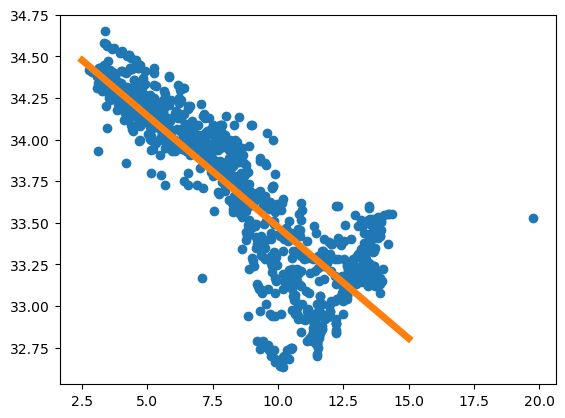

In [9]:
x = np.linspace(2.5,15,20)
y = x * A + B
plt.plot(temp_data[:1000],salin_data[:1000],'o')
plt.plot(x,y,linewidth = 5)

plt.show()
